<a href="https://colab.research.google.com/github/segnig/Kaggle-Competitions/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [621]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [622]:
FILE_PATH = "/content/drive/MyDrive/Data Science/titanic/"

In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [624]:
train_data = pd.read_csv(FILE_PATH + "train.csv")
test_data = pd.read_csv(FILE_PATH + "test.csv")

test_ID = test_data["PassengerId"]

What the data is look like?

In [625]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


$plot\ ratio\ of\ survived\ for\ the\ categorical\ variable$

In [626]:
def plot_ratio_of_survived(feature):
    train_data.groupby(feature)["Survived"].mean().plot(kind="bar", color=["blue", "orange", "green", "red", "purple", "brown"])

    # Set title and axis labels
    plt.title(f"Survival Rate by {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Survival Rate")

    # Show the plot
    plt.show()


In [627]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


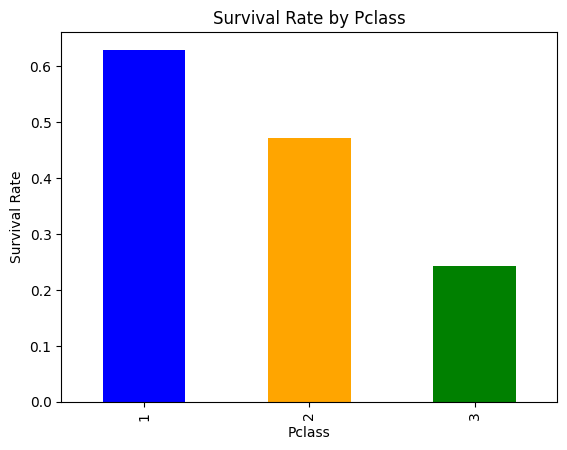

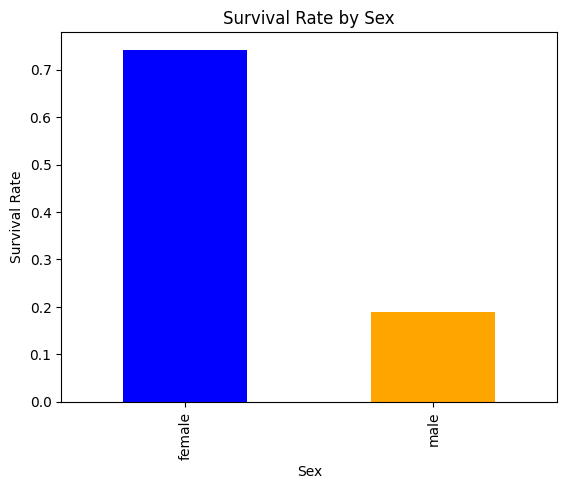

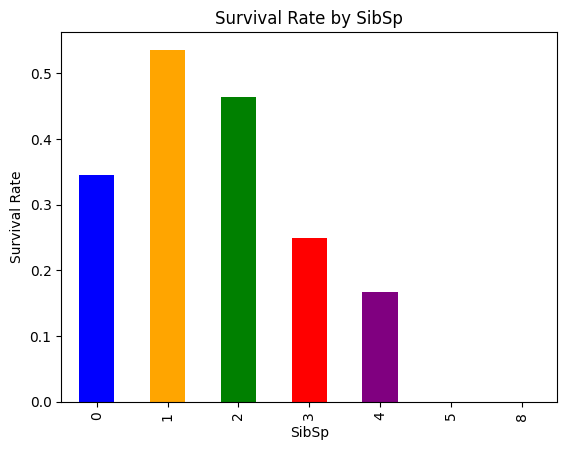

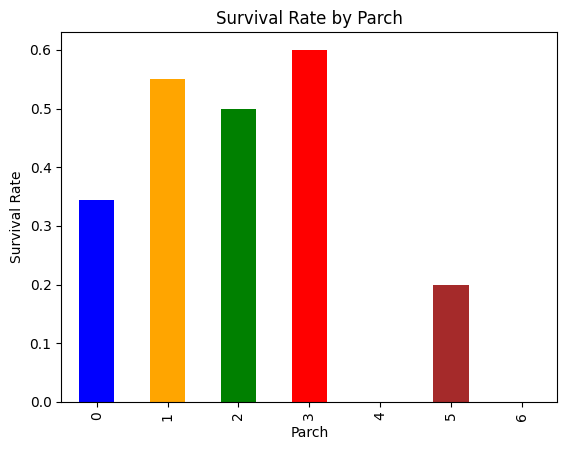

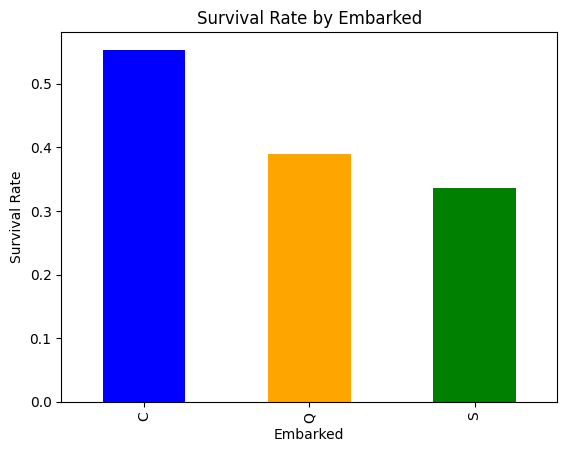

In [628]:
categorical_varialbes = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# plot survival ratio plot for every categorical variables
for var in categorical_varialbes:
    plot_ratio_of_survived(var)

# `Feature Engineering`

## Name Features

In [629]:
train_data["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


`Name`is in the format `*, Title. *`

In [630]:
train_data["title"] = train_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(train_data["title"].value_counts())

test_data["title"] = test_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(test_data["title"].value_counts())

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


---

### Function Documentation: `title_mapping`

#### **Description**:
The `title_mapping` function maps various titles into broader, predefined categories to standardize and simplify title data. This can be useful for tasks such as feature engineering, demographic analysis, or data cleaning in datasets containing titles.

---

#### **Function Signature**:
```python
def title_mapping(title):
```

#### **Parameters**:
- **`title`** (*str*):  
  A string representing an individual's title (e.g., "Mr", "Mrs", "Dr").  
---

#### **Returns**:
- (*str*): A string representing the broader category into which the input title is grouped. Possible return values include:
  - `1`: Includes adult male titles such as "Mr", "Don", "Rev", and others.
  - `2`: Includes titles for unmarried women such as "Miss", "Ms", and "Mlle".
  - `3`: Includes titles for married women such as "Mrs" and "Mme".
  - `4`: Specifically used for young boys.
  - `5`: For noble titles such as "Sir", "Lady", "Countess", and "Jonkheer".
  - `6`: A fallback category for any unmapped or unrecognized titles.

---

In [631]:
def title_mapping(title):
    """
    Maps various titles into broader categories.

    Args:
        title (str): The title to be mapped.

    Returns:
        str: A broader category for the title.
    """
    title = title.strip().capitalize()  # Handle case and whitespace variations
    if title in ["Mr", "Don", "Rev", "Dr", "Major", "Col", "Capt"]:
        return 1
    elif title in ["Ms", "Mlle", "Miss"]:
        return 2
    elif title in ["Mme", "Mrs"]:
        return 3
    elif title == "Master":
        return 4
    elif title in ["Sir", "Lady", "Countess", "Jonkheer"]:
        return 5
    else:
        return 6

In [632]:
train_data["title"] = train_data["title"].apply(title_mapping)
test_data["title"] = test_data["title"].apply(title_mapping)


print(train_data["title"].value_counts())
print(test_data["title"].value_counts())

title
1    536
2    185
3    126
4     40
5      4
Name: count, dtype: int64
title
1    245
2     79
3     72
4     21
6      1
Name: count, dtype: int64


Let plot the survival ratio for every titles

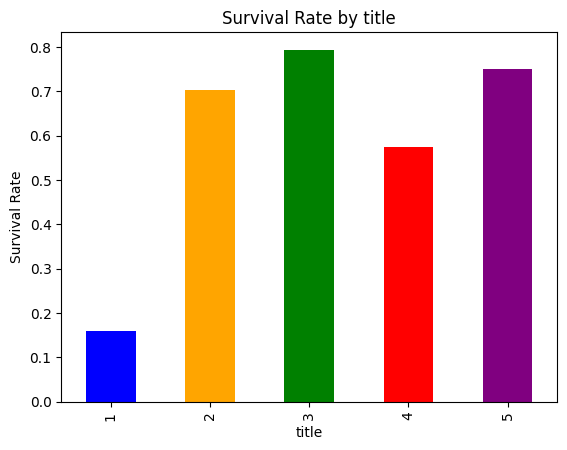

In [633]:
# the survived rate.
plot_ratio_of_survived("title")

# Age

In [634]:
# Missing value
print("Age Missing values =", train_data["Age"].isnull().sum())

Age Missing values = 177


### Filling 177 Missing Age Values by Group Title

#### 🛠️ **Objective**:  
Fill **177 missing values** in the `Age` column using the **average age** of individuals within each `title` group (e.g., "Mr", "Miss", "Mrs").

---

### 📊 **Approach**:

1. **Group Data by Title**:  
   - Titles such as **"Mr"**, **"Miss"**, **"Mrs"**, etc., are used for grouping.
2. **Calculate Group Mean**:  
   - Compute the **average age** within each title group.
3. **Fill Missing Values**:  
   - Replace `NaN` in the `Age` column with the **group's mean age**.


---

### 🎯 **Impact**:
- A total of **177 missing `Age` values** are now filled.
- This ensures no missing values remain in the `Age` column.

---


In [635]:
# Filling missing Age values in train data
train_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

# Filling missing Age values in test data using train data means
test_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

In [636]:
def plot_ratio_of_survived_by_age(min=0, max=80):
    # ratio survival per age of kde ratio specific age
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=train_data[(train_data["Age"] >= min) & (train_data["Age"] <= max)], x="Age", fill=True, ax=ax, hue="Survived")

    # title and label
    plt.title(f"Survival Rate by Age between {min} and {max}")
    plt.xlabel(f"Age")
    plt.ylabel("Survival Rate")

    # Show the plot
    plt.show()


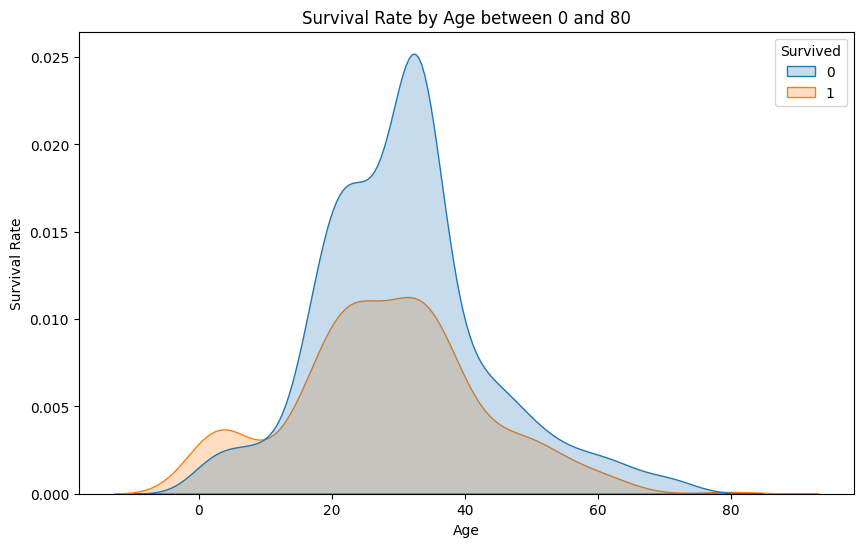

In [637]:
plot_ratio_of_survived_by_age(0, 80)

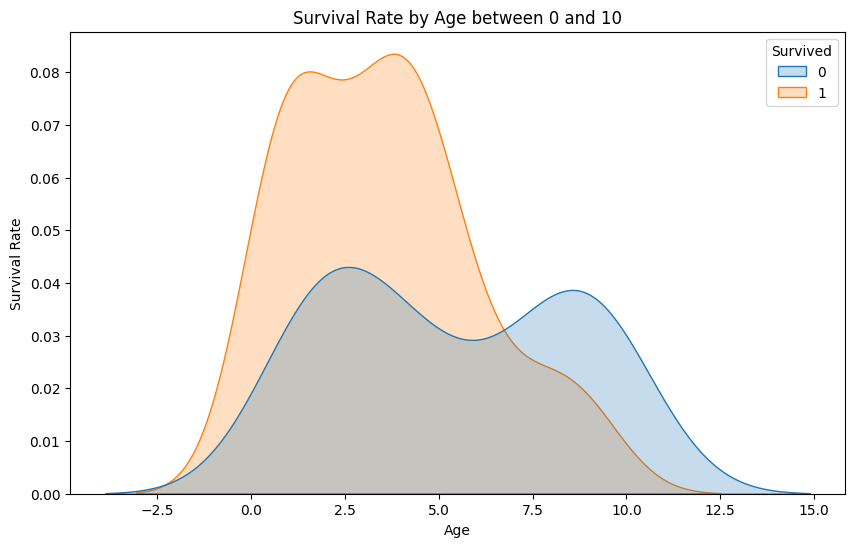

In [638]:
plot_ratio_of_survived_by_age(0, 10)

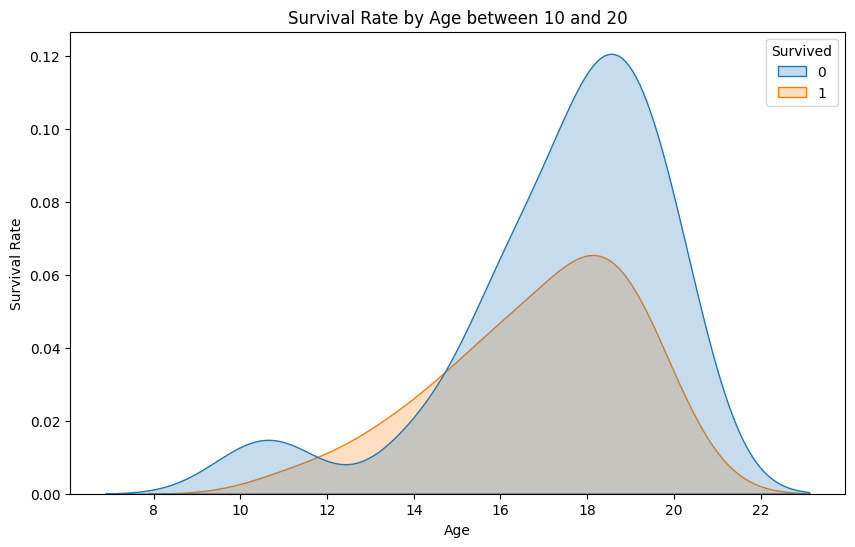

In [639]:
plot_ratio_of_survived_by_age(10, 20)

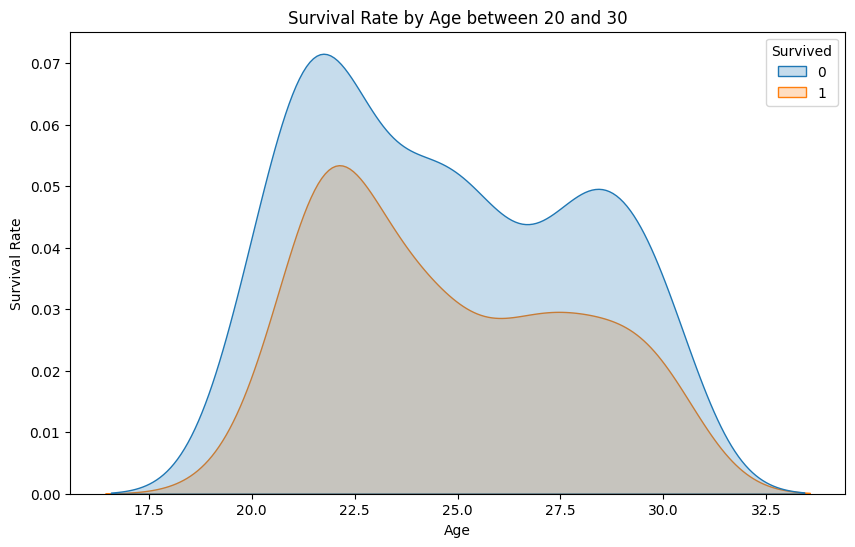

In [640]:
plot_ratio_of_survived_by_age(20, 30)

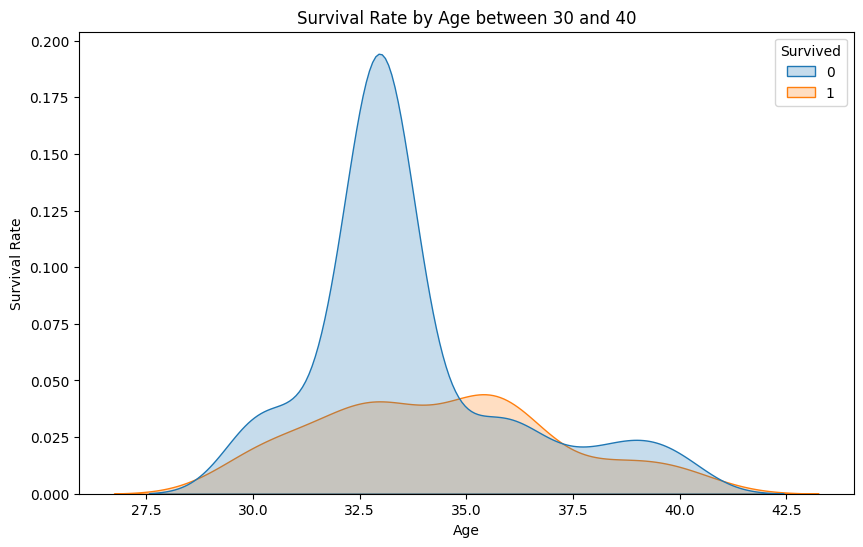

In [641]:
plot_ratio_of_survived_by_age(30, 40)

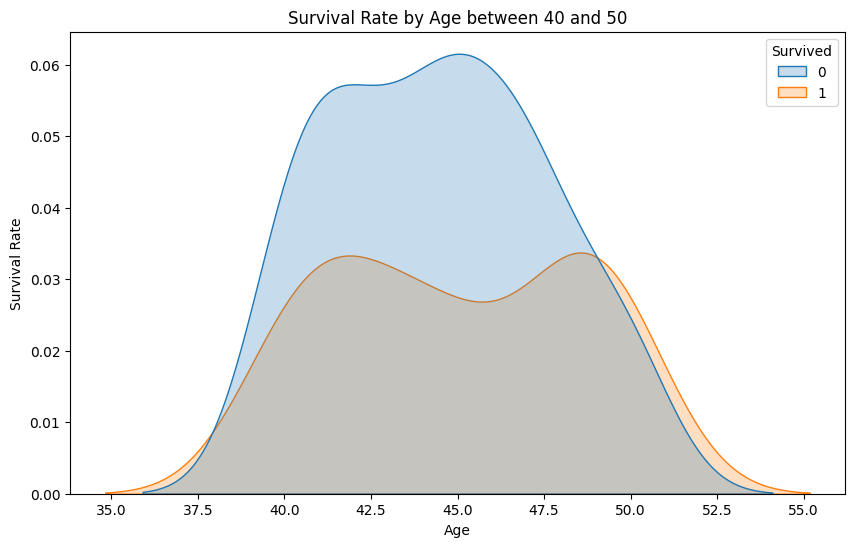

In [642]:
plot_ratio_of_survived_by_age(40, 50)

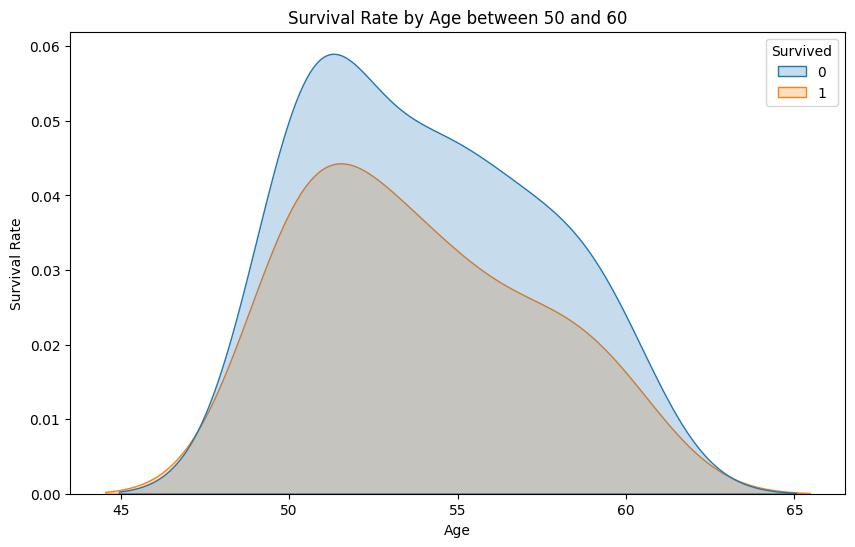

In [643]:
plot_ratio_of_survived_by_age(50, 60)

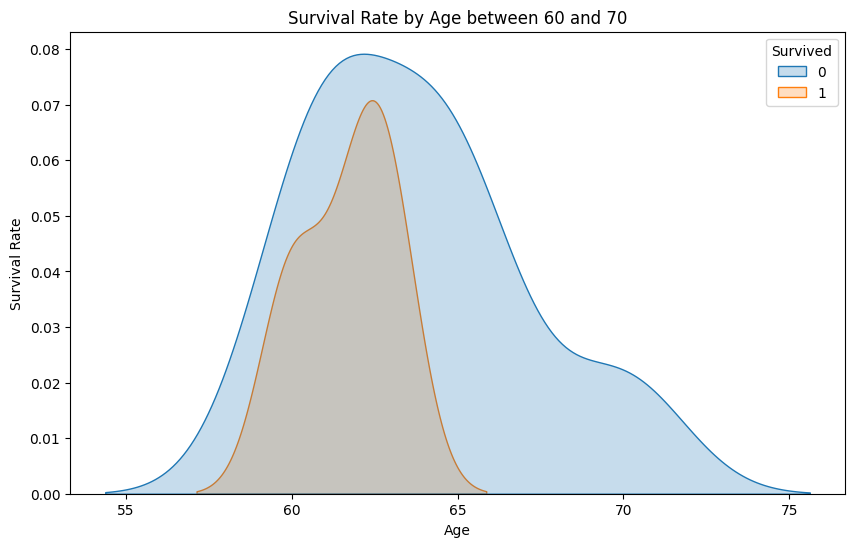

In [644]:
plot_ratio_of_survived_by_age(60, 70)

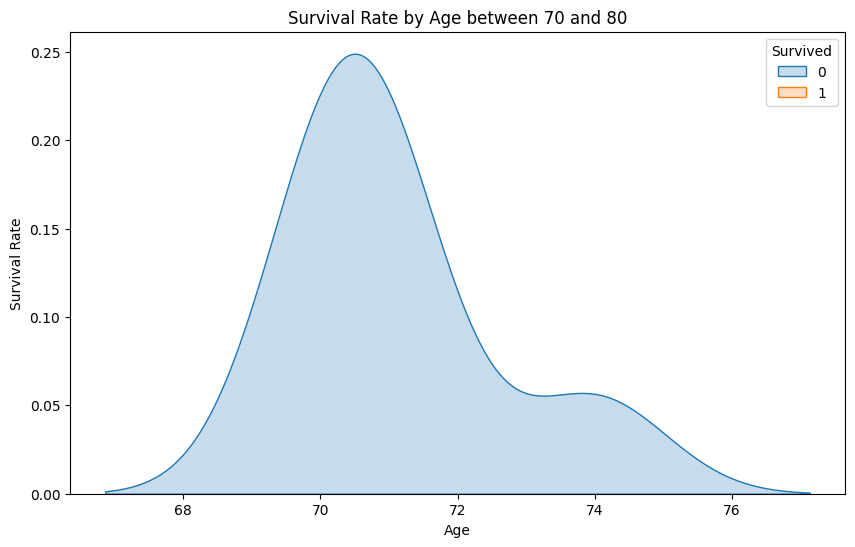

In [645]:
plot_ratio_of_survived_by_age(70, 80)

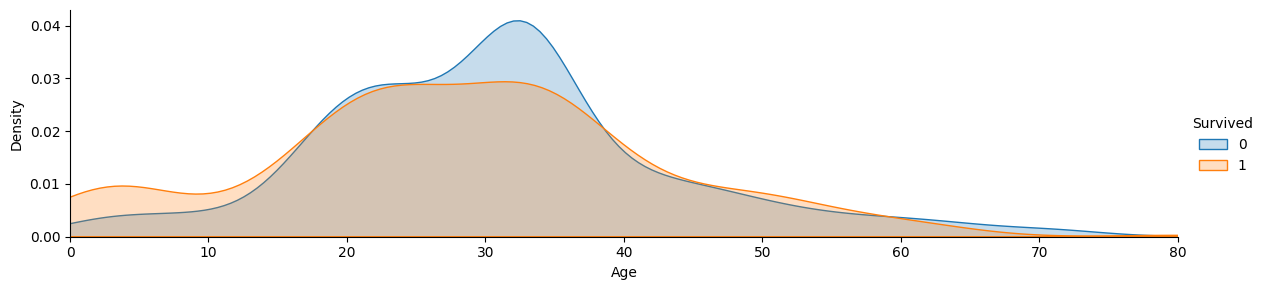

In [646]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

(0.0, 20.0)

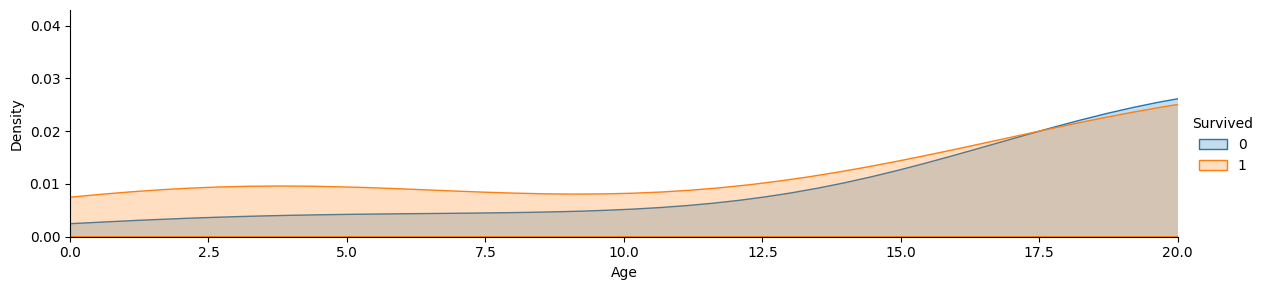

In [647]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

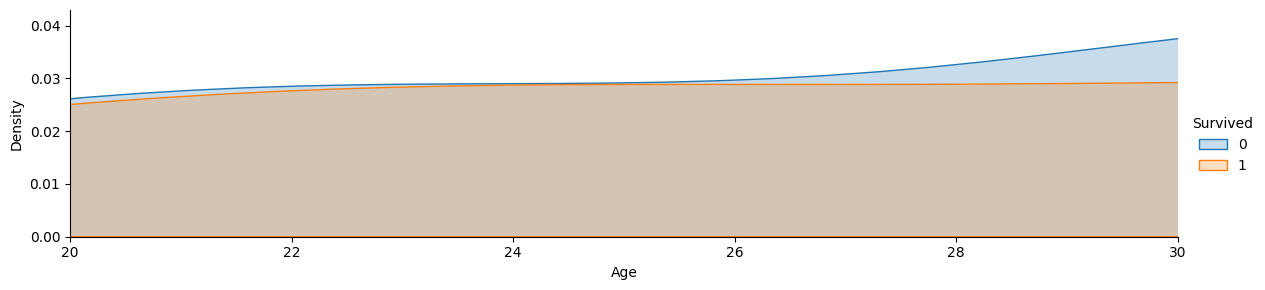

In [648]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

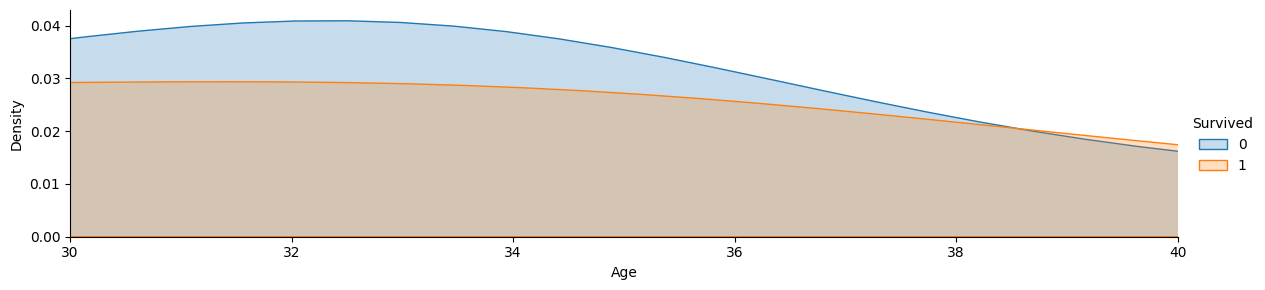

In [649]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 50.0)

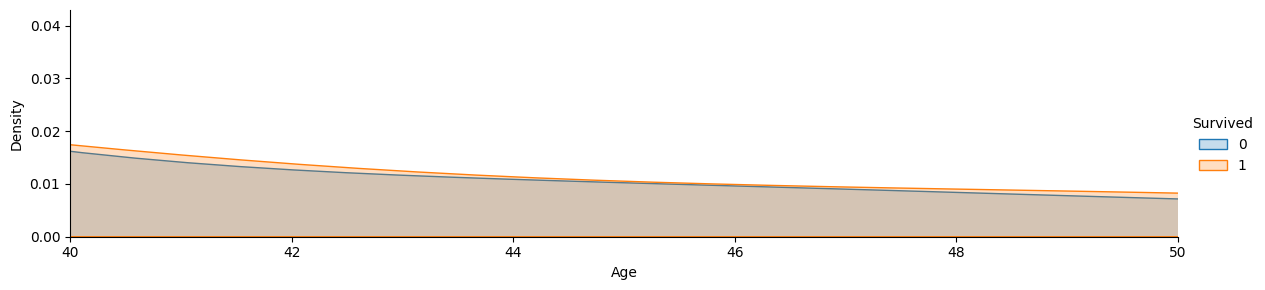

In [650]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(40, 50)

(50.0, 60.0)

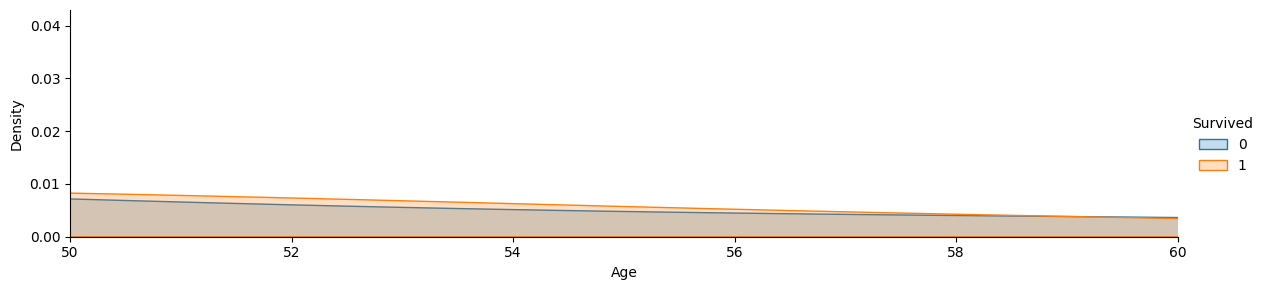

In [651]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(50, 60)

(60.0, 70.0)

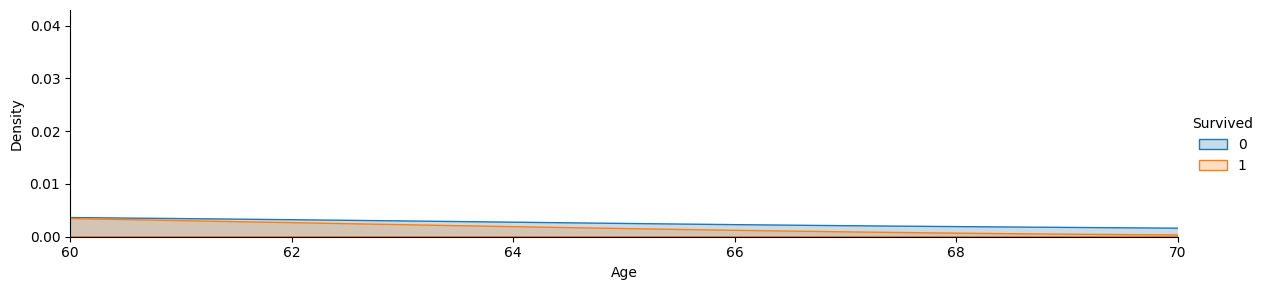

In [652]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(60, 70)

(70.0, 80.0)

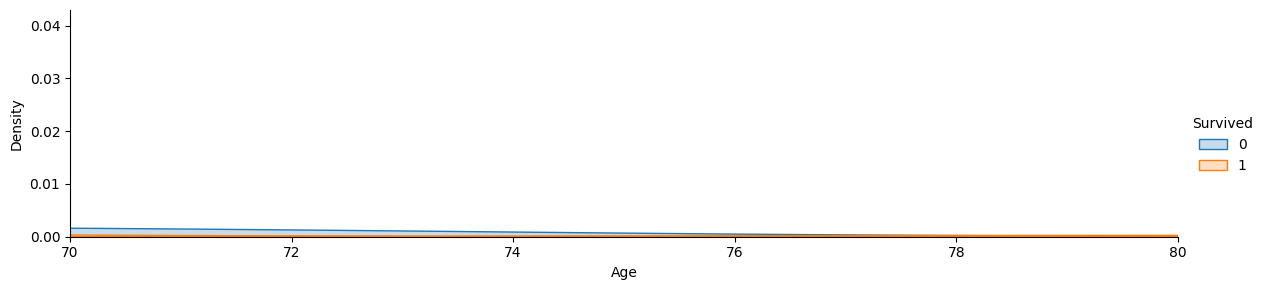

In [653]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(70, 80)

In [654]:
train_test_data = [train_data, test_data]

## Age Binning
(e.g., `0-17`, `17-38`, `38-61`, `61+`), you can follow these steps:

---

### 🎯 **Goal**:  
Interchange survival rates across specific age groups for better insight into survival distribution.

---

### 🛠️ **Steps to Implement**:

1. **Define Age Groups**:  
   - **Group 1**: `0-17` (children/teens)  
   - **Group 2**: `17-38` (young adults)  
   - **Group 3**: `38-61` (middle-aged adults)  
   - **Group 4**: `61+` (seniors)

2. **Calculate Survival Rate by Group**:
   - Filter data for each group.
   - Compute the survival rate for each age range.
---



In [655]:
# Categorize Age into groups
def age_group(age):
    if age <= 17:
        return "0-17"
    elif age <= 38:
        return "18-38"
    elif age <= 61:
        return "39-61"
    else:
        return "62+"

In [656]:
for dataset in train_test_data:
    dataset["Age"] = dataset["Age"].apply(age_group)


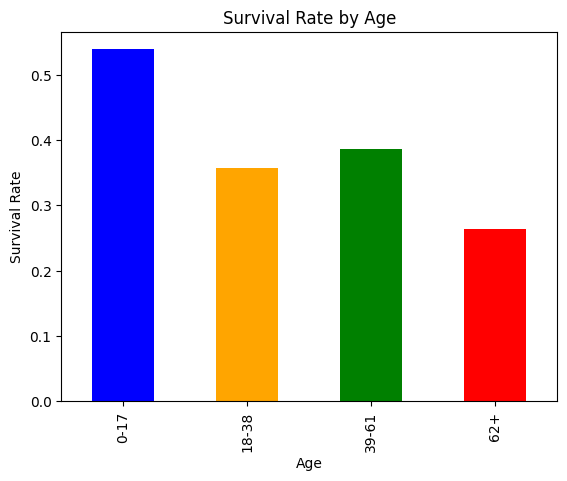

In [657]:
plot_ratio_of_survived("Age")

In [658]:
def age_group_mapping(age):
    if age == "0-17":
        return 0
    elif age == "18-38":
        return 1
    elif age == "39-61":
        return 2
    else:
        return 3

In [659]:
for dataset in train_test_data:
    dataset["Age"] = dataset["Age"].apply(age_group_mapping)

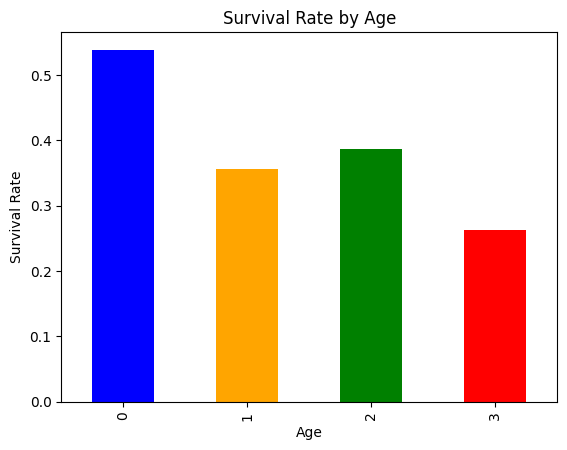

In [660]:
plot_ratio_of_survived("Age")

# Sex

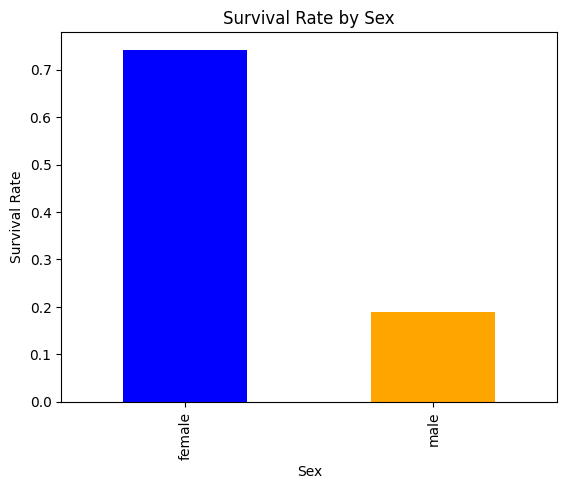

In [661]:
plot_ratio_of_survived("Sex")

In [662]:
print("Missing values age train dataset =", train_data["Sex"].isnull().sum())
print("Missing values age test dataset =", test_data["Sex"].isnull().sum())

Missing values age train dataset = 0
Missing values age test dataset = 0


# Pclass

In [663]:
from IPython.display import Image


Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

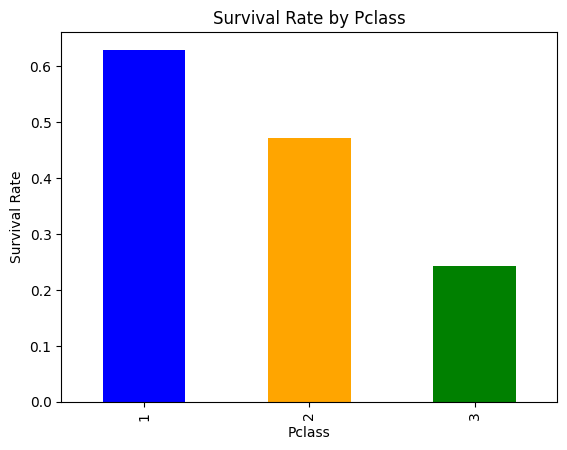

In [664]:
plot_ratio_of_survived("Pclass")

In [665]:
print("Missing values age train dataset =", train_data["Pclass"].isnull().sum())
print("Missing values age test dataset =", test_data["Pclass"].isnull().sum())

Missing values age train dataset = 0
Missing values age test dataset = 0


# Fare

In [666]:
print("Missing values age train dataset =", train_data["Fare"].isnull().sum())
print("Missing values age test dataset =", test_data["Fare"].isnull().sum())

Missing values age train dataset = 0
Missing values age test dataset = 1


In [667]:
for dataset in train_test_data:
    dataset["Fare"] = dataset.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

In [668]:
print("Missing values age train dataset =", train_data["Fare"].isnull().sum())
print("Missing values age test dataset =", test_data["Fare"].isnull().sum())

Missing values age train dataset = 0
Missing values age test dataset = 0


<Axes: xlabel='Pclass', ylabel='Fare'>

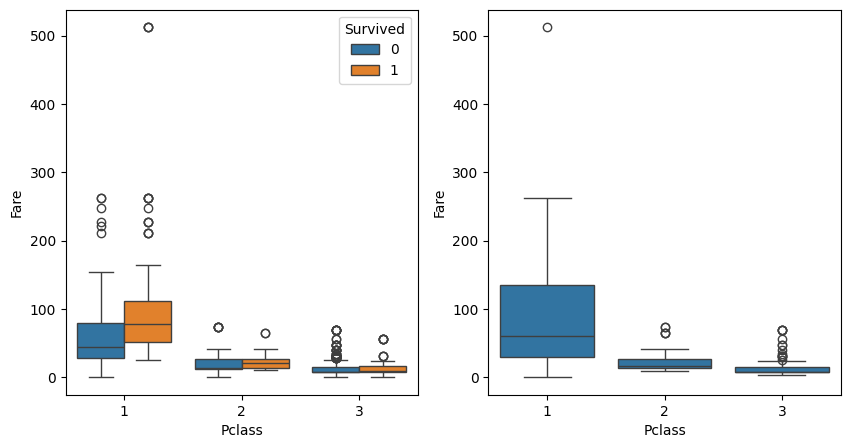

In [669]:
# box plot who Fare distributed over a dataset
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=train_data, x="Pclass", y="Fare", ax=ax[0], hue="Survived")
sns.boxplot(data=test_data, x="Pclass", y="Fare", ax=ax[1])

# Family

In [670]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

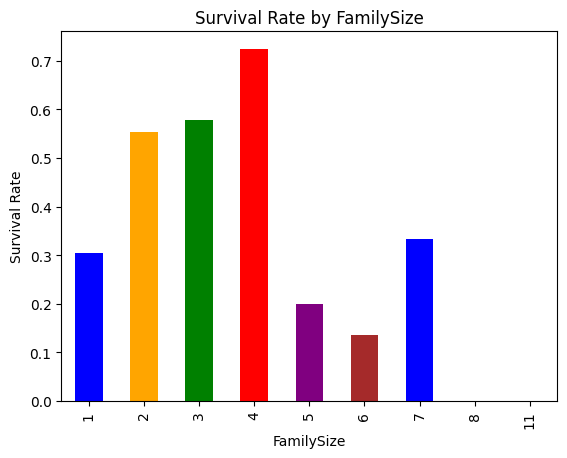

In [671]:
plot_ratio_of_survived("FamilySize")

In [672]:
for dataset in train_test_data:
    dataset["isAlone"] = dataset["FamilySize"].apply(lambda x: 1 if x == 1 else 0)

In [673]:
for dataset in train_test_data:
    dataset["Fare_per_person"] = dataset["Fare"] / dataset["FamilySize"]

<Axes: xlabel='Pclass', ylabel='Fare_per_person'>

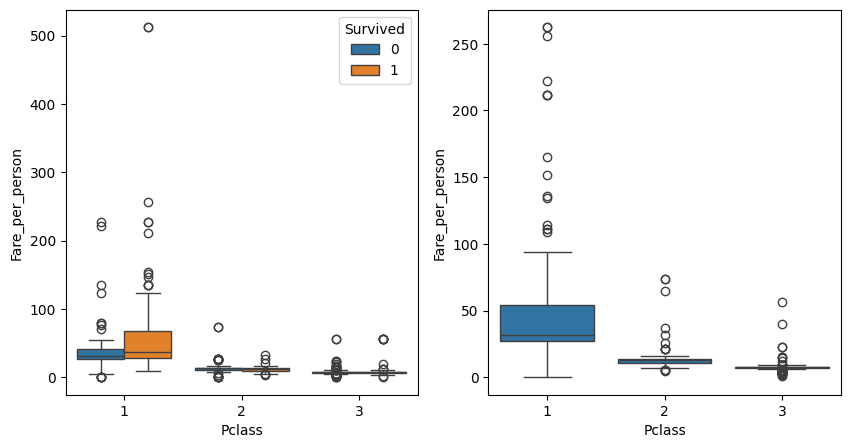

In [674]:
# box plot with Fare distribution over a dataset
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=train_data, x="Pclass", y="Fare_per_person", ax=ax[0], hue="Survived")
sns.boxplot(data=test_data, x="Pclass", y="Fare_per_person", ax=ax[1])

<Axes: xlabel='Fare_per_person', ylabel='Density'>

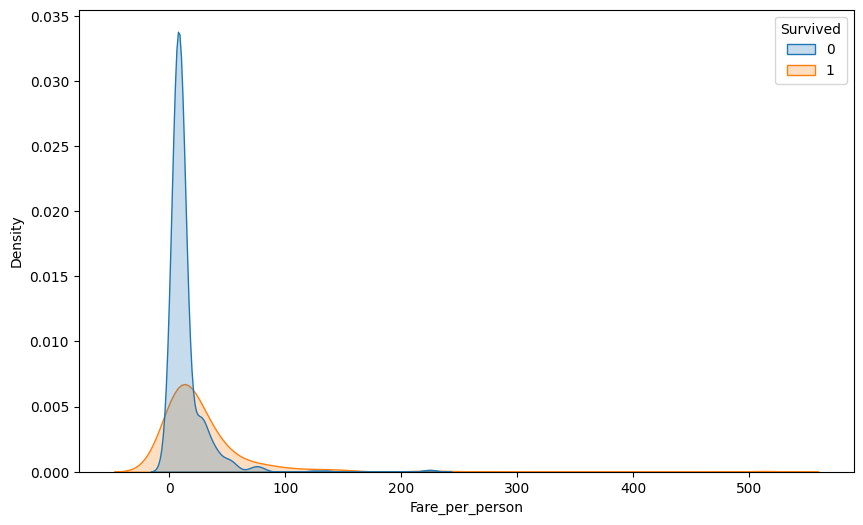

In [675]:
# Fate_per_person kde plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=train_data, x="Fare_per_person", fill=True, ax=ax, hue="Survived")


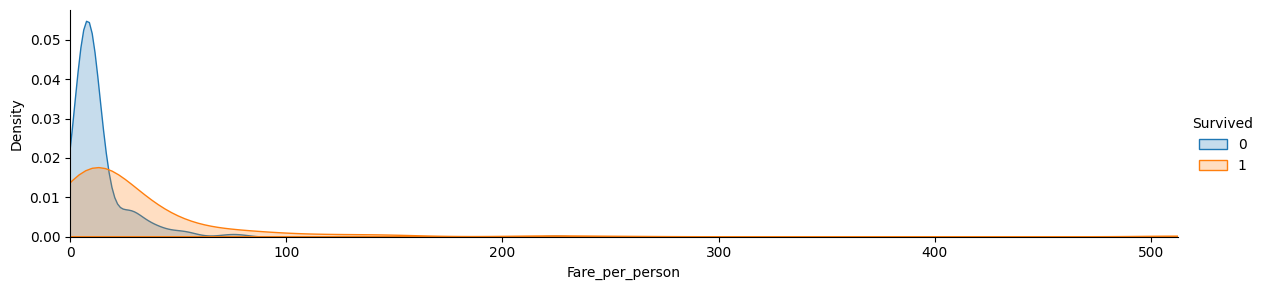

In [676]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend();


(0.0, 20.0)

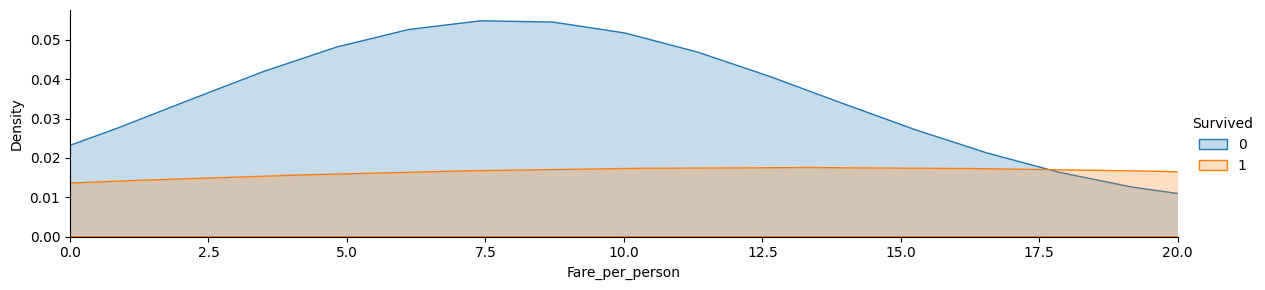

In [677]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend()
plt.xlim(0, 20)

(16.0, 30.0)

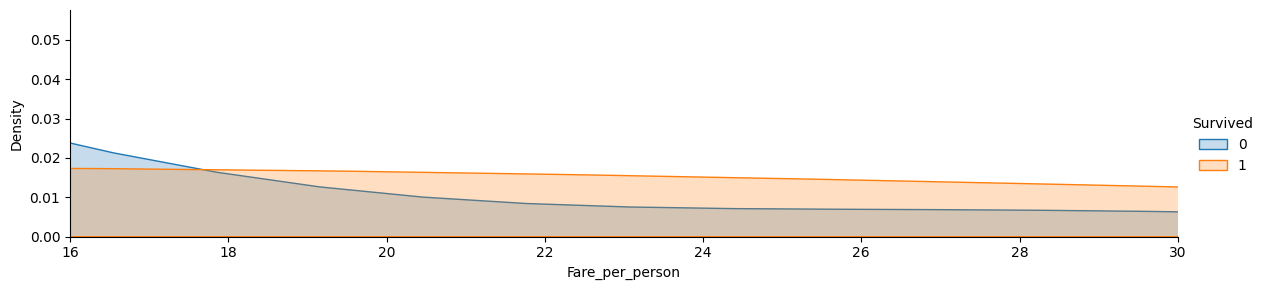

In [678]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend()
plt.xlim(16, 30)

(30.0, 60.0)

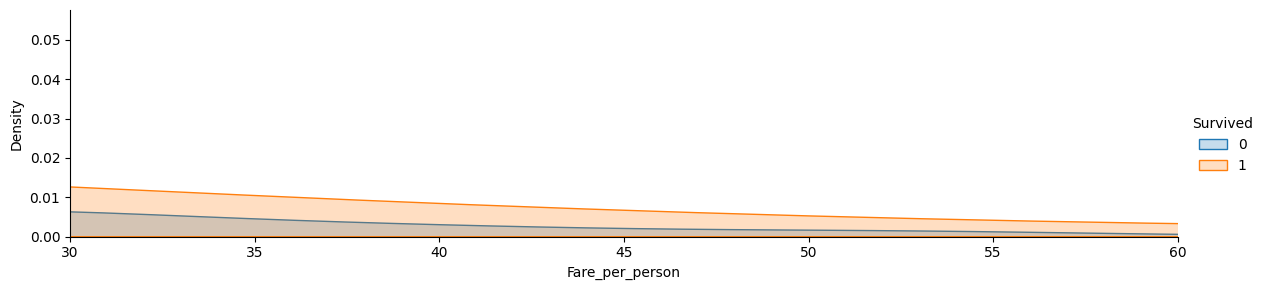

In [679]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend()
plt.xlim(30, 60)

(60.0, 200.0)

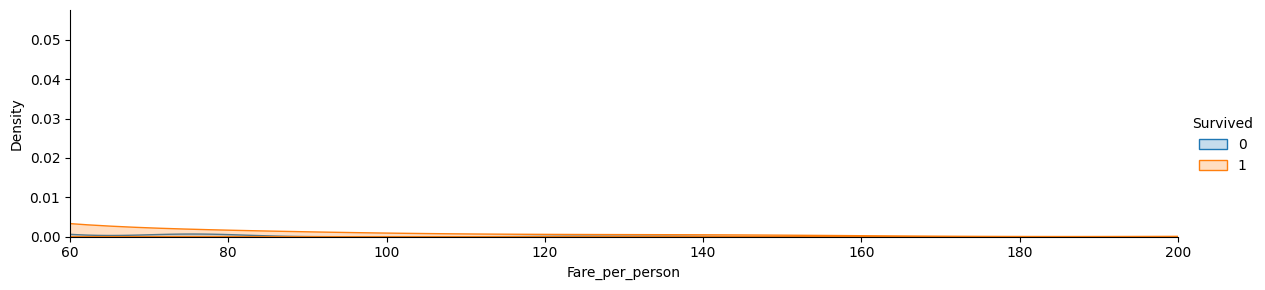

In [680]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend()
plt.xlim(60, 200)

(200.0, 500.0)

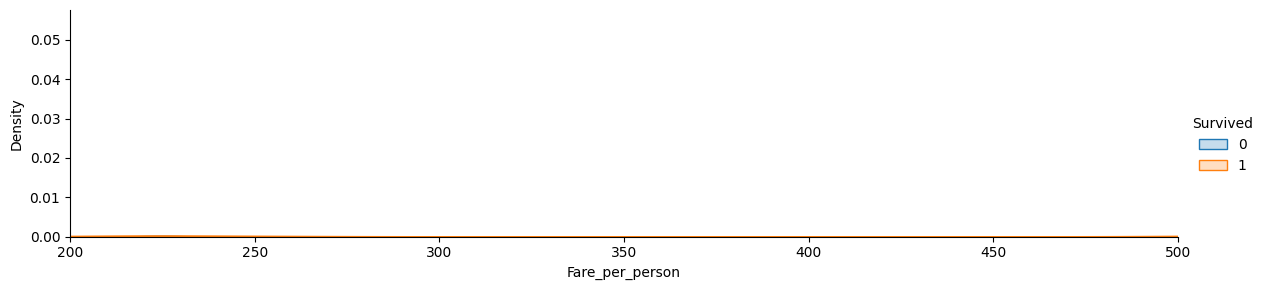

In [681]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare_per_person',shade= True)
facet.set(xlim=(0, train_data['Fare_per_person'].max()))
facet.add_legend()
plt.xlim(200, 500)

In [682]:
def map_fare_per_person(fare_per_person):
    return 1 if fare_per_person <= 17.6 else 0

In [683]:
# Encoding
for dataset in train_test_data:
    dataset["Fare_per_person"] = dataset["Fare_per_person"].apply(map_fare_per_person)

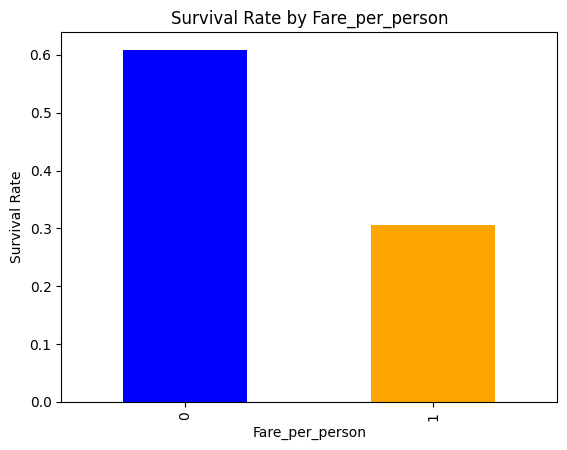

In [684]:
plot_ratio_of_survived("Fare_per_person")

# Embarked

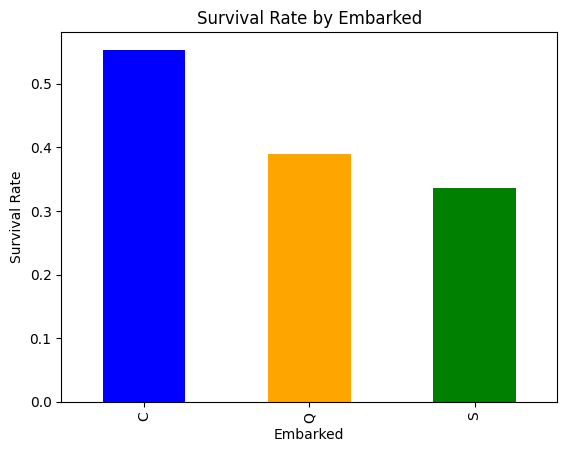

In [685]:
plot_ratio_of_survived("Embarked")

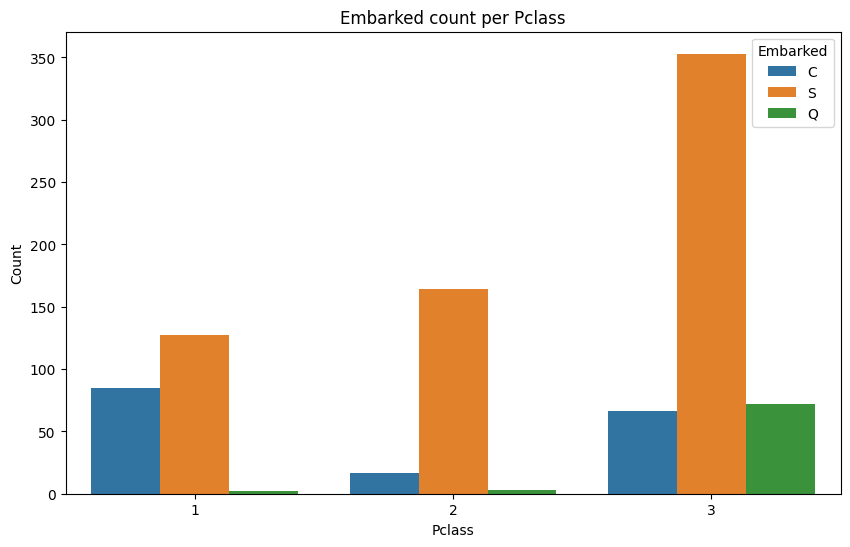

In [686]:
# Embarked rate per Pclass
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=train_data, x="Pclass", hue="Embarked", ax=ax)

plt.title("Embarked count per Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

In [687]:
# Filling missing values with the highest mode of Pclass data
for dataset in train_test_data:
    dataset["Embarked"] = dataset.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [688]:
for dataset in train_test_data:
    print(dataset["Embarked"].isnull().sum())

0
0


In [689]:
# Encoding
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Cabin

In [690]:
for dataset in train_test_data:
    print(dataset["Cabin"].isnull().sum())

687
327


In [691]:
def map_cabin(cabin):
    if pd.isnull(cabin):
        return 0
    else:
        return 1

In [692]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].apply(map_cabin)

In [693]:
for dataset in train_test_data:
    print(dataset["Cabin"].isnull().sum())

0
0


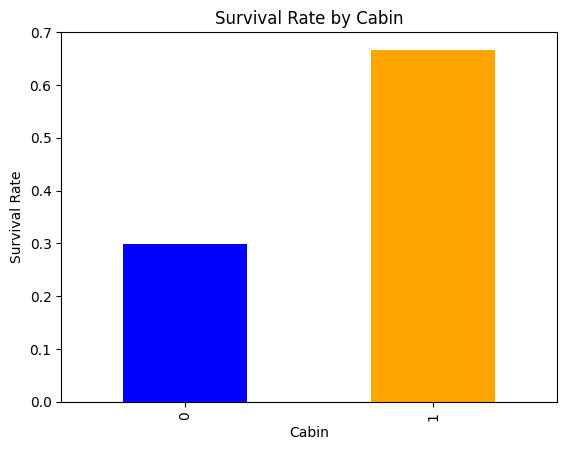

In [694]:
plot_ratio_of_survived("Cabin")

In [695]:
# train dataset missing value
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [696]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [697]:
dropped_cols = ["Name", "Ticket", "PassengerId", "Fare", "Parch", "SibSp"]

for dataset in train_test_data:
    dataset.drop(dropped_cols, axis=1, inplace=True)

In [698]:
for dataset in train_test_data:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    int64 
 4   Cabin            891 non-null    int64 
 5   Embarked         891 non-null    int64 
 6   title            891 non-null    int64 
 7   FamilySize       891 non-null    int64 
 8   isAlone          891 non-null    int64 
 9   Fare_per_person  891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Pclass           418 non-null    int64 
 1   Sex              418 non-null    object
 2   Age       

In [699]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    int64 
 4   Cabin            891 non-null    int64 
 5   Embarked         891 non-null    int64 
 6   title            891 non-null    int64 
 7   FamilySize       891 non-null    int64 
 8   isAlone          891 non-null    int64 
 9   Fare_per_person  891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB


In [700]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Pclass           418 non-null    int64 
 1   Sex              418 non-null    object
 2   Age              418 non-null    int64 
 3   Cabin            418 non-null    int64 
 4   Embarked         418 non-null    int64 
 5   title            418 non-null    int64 
 6   FamilySize       418 non-null    int64 
 7   isAlone          418 non-null    int64 
 8   Fare_per_person  418 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 29.5+ KB


## Encoding Sex and title with ONE-HOT-ENCODING

In [701]:
# get_dummies encoding
train_data = pd.get_dummies(train_data, columns=["Sex"], prefix="_", drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex"], prefix="_", drop_first=True)

# **Data splitting**
---
### Splitting a Dataset: Vertical and Horizontal

#### **Vertical Splitting**:
This step involves dividing the dataset into two components:
1. **Features Matrix (`X`)**:
   - Contains all the independent variables (predictors) in the dataset.
   - Excludes the target column.
2. **Target Vector (`y`)**:
   - Contains only the dependent variable (the value to be predicted or classified).


---

#### **Horizontal Splitting**:
This step divides the dataset into training and testing subsets:
1. **Training Set (90%)**:
   - Used to train the machine learning model.
   - Contains 90% of the rows from the original dataset.
2. **Testing Set (10%)**:
   - Used to evaluate the model’s performance.
   - Contains the remaining 10% of the rows.
---


In [702]:
# vertical splitting

X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [703]:
# Horizontal splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (801, 9)
X_test shape: (90, 9)
y_train shape: (801,)
y_test shape: (90,)


# Modelling

In [704]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

## Cross Validation (K-fold)

In [705]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [706]:
clf = KNeighborsClassifier(n_neighbors=13)

scoring = "accuracy"
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.79012346 0.8        0.85       0.7875     0.8625     0.8125
 0.825      0.8        0.8        0.85      ]


In [707]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 81.78


### DecisionTreeClassifier

In [708]:
clf = DecisionTreeClassifier()

scoring = "accuracy"
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.725      0.825      0.8375     0.8        0.775
 0.775      0.7875     0.8        0.825     ]


In [709]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 79.28


### RandomForestClassifier

In [710]:
clf = RandomForestClassifier(n_estimators=13)

scoring = "accuracy"
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75308642 0.7125     0.8125     0.8125     0.8125     0.7875
 0.775      0.8        0.8125     0.8375    ]


In [711]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 79.16


In [712]:
clf = GaussianNB()

scoring = "accuracy"
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7037037 0.775     0.8125    0.8       0.85      0.7375    0.75
 0.8125    0.8125    0.825    ]


In [713]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 78.79


### SVC

In [714]:
clf = SVC()

scoring = "accuracy"
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75308642 0.8125     0.8625     0.85       0.925      0.8125
 0.8        0.85       0.8125     0.85      ]


In [715]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 83.28


In [716]:
clf = SVC()

scoring = "accuracy"
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.82022472 0.82022472 0.85393258 0.82022472
 0.82022472 0.85393258 0.83146067 0.87640449]


In [717]:
print("Score mean: {}".format(round(np.mean(score)*100, 2)))

Score mean: 83.28


In [718]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [719]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



0.8333333333333334
[[45  9]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



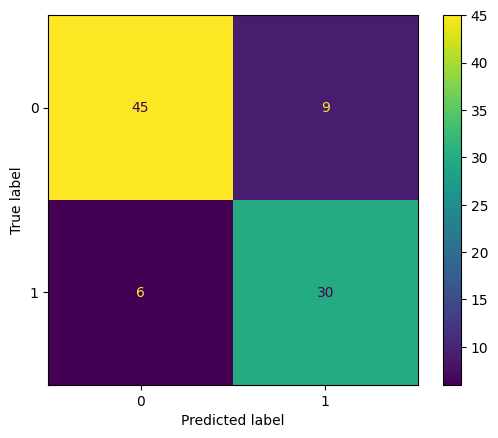

In [720]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [721]:
model = SVC()
model.fit(X, y)

SVC()

In [722]:
# Random forest

model = RandomForestClassifier(n_estimators=13)
model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=13)

0.8666666666666667
[[49  5]
 [ 7 29]]


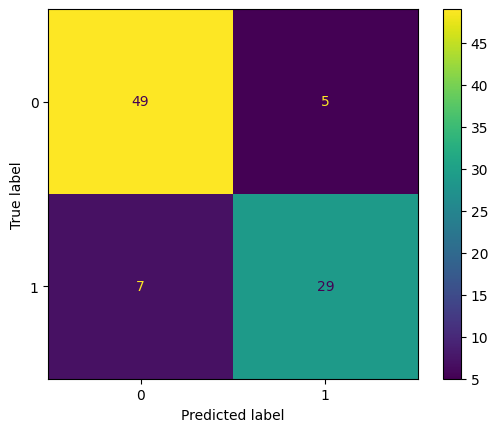

In [723]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [724]:
# hyper parameters
from sklearn.model_selection import GridSearchCV

# random forest hyper parameter
param_grid = {
    "n_estimators": [5, 10, 15,],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15]},
             verbose=2)

In [725]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 15}

In [726]:
beat_param = grid_search.best_params_

model = RandomForestClassifier(
    n_estimators=beat_param["n_estimators"],
    max_depth=beat_param["max_depth"],
    min_samples_split=beat_param["min_samples_split"],
    min_samples_leaf=beat_param["min_samples_leaf"],
    max_features=beat_param["max_features"],
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=15)

0.8555555555555555
[[47  7]
 [ 6 30]]


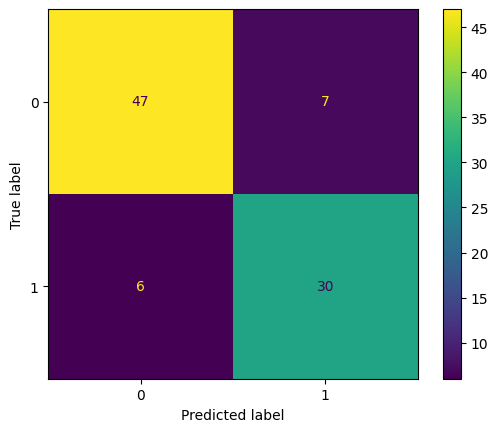

In [727]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [728]:
model = RandomForestClassifier(
    n_estimators=beat_param["n_estimators"],
    max_depth=beat_param["max_depth"],
    min_samples_split=beat_param["min_samples_split"],
    min_samples_leaf=beat_param["min_samples_leaf"],
    max_features=beat_param["max_features"],
)

model.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=15)

### Prediction

In [730]:
from datetime import datetime

now = datetime.now()
# year-month-date HR-MIN-sec
timestamp = now.strftime("%Y-%m-%d %H-%M-%S")

y_pred = model.predict(test_data)

print(sum(y_pred))
submission = pd.DataFrame({"PassengerId": test_ID, "Survived": y_pred})
submission.to_csv(FILE_PATH + f"submission_{timestamp}_rf.csv", index=False)

145


In [731]:
# train many model parallel and prediction result the highest mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

def get_best_model(X_train, y_train, X_test, y_test):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    # models
    models = {
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "NaiveBayes": GaussianNB(),
        "SVC": SVC(),
    }
    best_model = None
    best_score = 0
    for name, model in models.items():
        scoring = "accuracy"
        score = cross_val_score(model, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
        print(f"{name} score: {score}")
        print(f"{name} score mean: {round(np.mean(score)*100, 2)}")
        if np.mean(score) > best_score:
            best_score = np.mean(score)
            best_model = model
    print(f"Best model: {best_model}")
    print(f"Best score: {best_score}")



In [732]:
get_best_model(X_train, y_train, X_test, y_test)

KNN score: [0.77777778 0.7625     0.8125     0.8125     0.8        0.8
 0.7625     0.8375     0.8625     0.825     ]
KNN score mean: 80.53
DecisionTree score: [0.77777778 0.725      0.825      0.8125     0.8        0.775
 0.775      0.7875     0.8        0.825     ]
DecisionTree score mean: 79.03
RandomForest score: [0.77777778 0.725      0.825      0.7875     0.825      0.8125
 0.7875     0.825      0.825      0.8375    ]
RandomForest score mean: 80.28
NaiveBayes score: [0.7037037 0.775     0.8125    0.8       0.85      0.7375    0.75
 0.8125    0.8125    0.825    ]
NaiveBayes score mean: 78.79
SVC score: [0.75308642 0.8125     0.8625     0.85       0.925      0.8125
 0.8        0.85       0.8125     0.85      ]
SVC score mean: 83.28
Best model: SVC()
Best score: 0.8328086419753087


In [733]:
def multi_model_prediction(X_test, X_train, y_train):
    models = {
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "NaiveBayes": GaussianNB(),
        "SVC": SVC(),
    }
    prediction_result = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        prediction_result.append(y_pred)

    df_res = pd.DataFrame(prediction_result).T
    df_res.columns = models.keys()
    return df_res.mode(axis=1)


In [734]:
y_pred = multi_model_prediction(X_test, X_train, y_train)

In [735]:
accuracy_score(y_test, y_pred)

0.8555555555555555

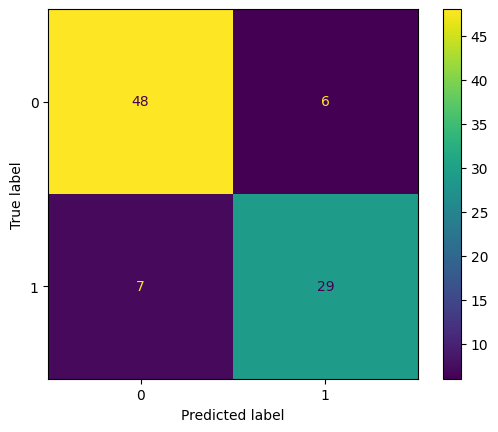

In [736]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [737]:
y_pred = multi_model_prediction(test_data, X, y)

y_pred.value_counts()

,count
0,
0,253
1,165


In [738]:
from datetime import datetime

now = datetime.now()
# year-month-date HR-MIN-sec
timestamp = now.strftime("%Y-%m-%d %H-%M-%S")

y_pred = model.predict(test_data)
submission = pd.DataFrame({"PassengerId": test_ID, "Survived": y_pred})
submission.to_csv(FILE_PATH + f"submission_{timestamp}_multi_model.csv", index=False)